<a href="https://colab.research.google.com/github/prawitd/Customer-Analytics/blob/main/05%20Voice%20of%20Customers/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.TM2NN04Ntb/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.cGLT0V16EK/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.EMMRhnODP0/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time #กำกับเวลา delay เพื่อรอให้เว็บโหลดเสร็จ

def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")

    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [ ]:
driver = driversetup() #เปิด selenium ใน collab ดังนั้นถ้า error ต้องมา run อีกครั้ง

In [ ]:
driver.get("https://www.tripadvisor.com/Restaurant_Review-g293916-d6943003-Reviews-Attico-Bangkok.html") #ใส่เว็บที่จะ scrap

In [ ]:
reviews = driver.find_elements(By.CLASS_NAME, "partial_entry") #ระบุ css class ที่ครอบ data เลือกใช้ CLA SS_NAME,

In [ ]:
len(reviews)

17

In [ ]:
reviews[1].text

'What a fantastic Italian restaurant! High up on the 28th floor of Radisson Blu Plaza. We had dinner there three days in a row and we would have kept going if we didn’t have to fly home. Every dish we had was made to perfection....More'

In [ ]:
reviews = driver.find_elements(By.XPATH, '//div[@class="entry"]/p[@class="partial_entry"]') #มองหา template ของ html ที่ครอบ data span[] เพราะในนั้นไม่มี class attr

In [ ]:
len(reviews)

17

In [ ]:
reviews[0].text

'Amazing restaurant and food. Gluten free options available and delicious. I had the best gluten free pasta in my life (and I am from Italy). I will be coming again soon. Prices absolutely coherent with the quality of food, service and location.'

In [ ]:
reviews = []
for i in range(0,305,17): #range(เริ่มที่ ข้อมูลคอมเม้นต์ที่เท่าไหร่, จบที่ข้อมูลทีเท่าไหร่, ทีละกี่ข้อมูลต่อหน้า)
    driver.get("https://www.tripadvisor.com/Restaurant_Review-g293916-d6943003-Reviews-or"+str(i)+"-Attico-Bangkok.html")
    print(i, end=" ")
    time.sleep(5)
    lis_reviews = driver.find_elements(By.CLASS_NAME, "partial_entry")[1:]
    print(len(lis_reviews))
    for review in lis_reviews:
        reviews.append(review.text)

0 16
17 14
34 14
51 14
68 14
85 14
102 14
119 15
136 24
153 21
170 29
187 27
204 26
221 29
238 13
255 16
272 16
289 16


In [ ]:
reviews

['What a fantastic Italian restaurant! High up on the 28th floor of Radisson Blu Plaza. We had dinner there three days in a row and we would have kept going if we didn’t have to fly home. Every dish we had was made to perfection....More',
 'The restaurant has a cosy ambient and nice view from the 28th floor of the building. Food is good (although the portions were a bit small), service excellent, whole team is very well-managed. Prices are very reasonable, including the wine list. Recommended.',
 'If you want to have a short break of Thai food or the feeling of Thailand , you can have a trip to Italy :). The food was special prepared with all our wishes , vegan , vegetarian and as well for the meat lovers....More',
 'Dear Micha S, thank you for taking the time to review Attico on TripAdvisor. I am pleases to read that you enjoyed your time with us and that you felt the food and service was outstanding. I will make sure to pass on your compliments...More',
 'The restaurant looks authent

# **Preparing data**

In [ ]:
import pandas as pd
df = pd.DataFrame(reviews, columns=["review"])

In [ ]:
df.head()

,review
0,What a fantastic Italian restaurant! High up o...
1,The restaurant has a cosy ambient and nice vie...
2,If you want to have a short break of Thai food...
3,"Dear Micha S, thank you for taking the time to..."
4,"The restaurant looks authentic Italien, with g..."


In [ ]:
!pip install --upgrade pip #ถ้า modeling error ต้องมา run ใหม่
!pip install --upgrade gensim
!pip install --upgrade pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings #นำ waring ออก
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from gensim.utils import simple_preprocess

texts = df.review.apply(simple_preprocess)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')

In [ ]:
texts = texts.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
texts

0      [fantastic, italian, restaurant, high, th, flo...
1      [restaurant, cosy, ambient, nice, view, th, fl...
2      [want, short, break, thai, food, feeling, thai...
3      [dear, micha, thank, taking, time, review, att...
4      [restaurant, looks, authentic, italien, great,...
                             ...                        
327    [usually, come, twice, month, chef, danillo, n...
328    [amazing, attico, amazing, chef, thank, amazin...
329    [attico, radisson, blue, bangkok, always, winn...
330    [chef, danilo, aissa, antisemite, dinner, rest...
331    [dear, maxime, good, morning, bangkok, surpris...
Name: review, Length: 332, dtype: object

# **Topic modeling**

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

n_topics = 5

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.024812 -0.016729       1        1  28.494523
0      0.030798 -0.011271       2        1  22.703043
3     -0.050043 -0.054892       3        1  20.339334
4      0.063827  0.028280       4        1  17.551305
1     -0.069394  0.054612       5        1  10.911793, topic_info=           Term        Freq       Total Category  logprob  loglift
23         food  174.000000  174.000000  Default  30.0000  30.0000
16   restaurant   95.000000   95.000000  Default  29.0000  29.0000
53      enjoyed   55.000000   55.000000  Default  28.0000  28.0000
196       staff   38.000000   38.000000  Default  27.0000  27.0000
204       guest   15.000000   15.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
196       staff    4.814298   38.809824   Topic5  -4.7685   0.1282
153        warm    4.188960   22.115927   Topic5  -4.9077   0.5515
24         good    4.961208  102.647108   Topic5  -4.7385  -0.8143
211       pasta    3.752230   22.083243   Topic5  -5.0178   0.4429
58       review    3.815418   32.257515   Topic5  -5.0011   0.0806

[313 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
261       1  0.142788  absolutely
261       2  0.571154  absolutely
261       5  0.285577  absolutely
209       1  0.176554     already
209       2  0.353108     already
...     ...       ...         ...
283       3  0.627219       words
283       5  0.268808       words
132       1  0.328828       yummy
132       2  0.109609       yummy
132       4  0.438438       yummy

[745 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])

# **WordCloud**

In [ ]:
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
long_string = ','.join(list(df['review'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate(long_string)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


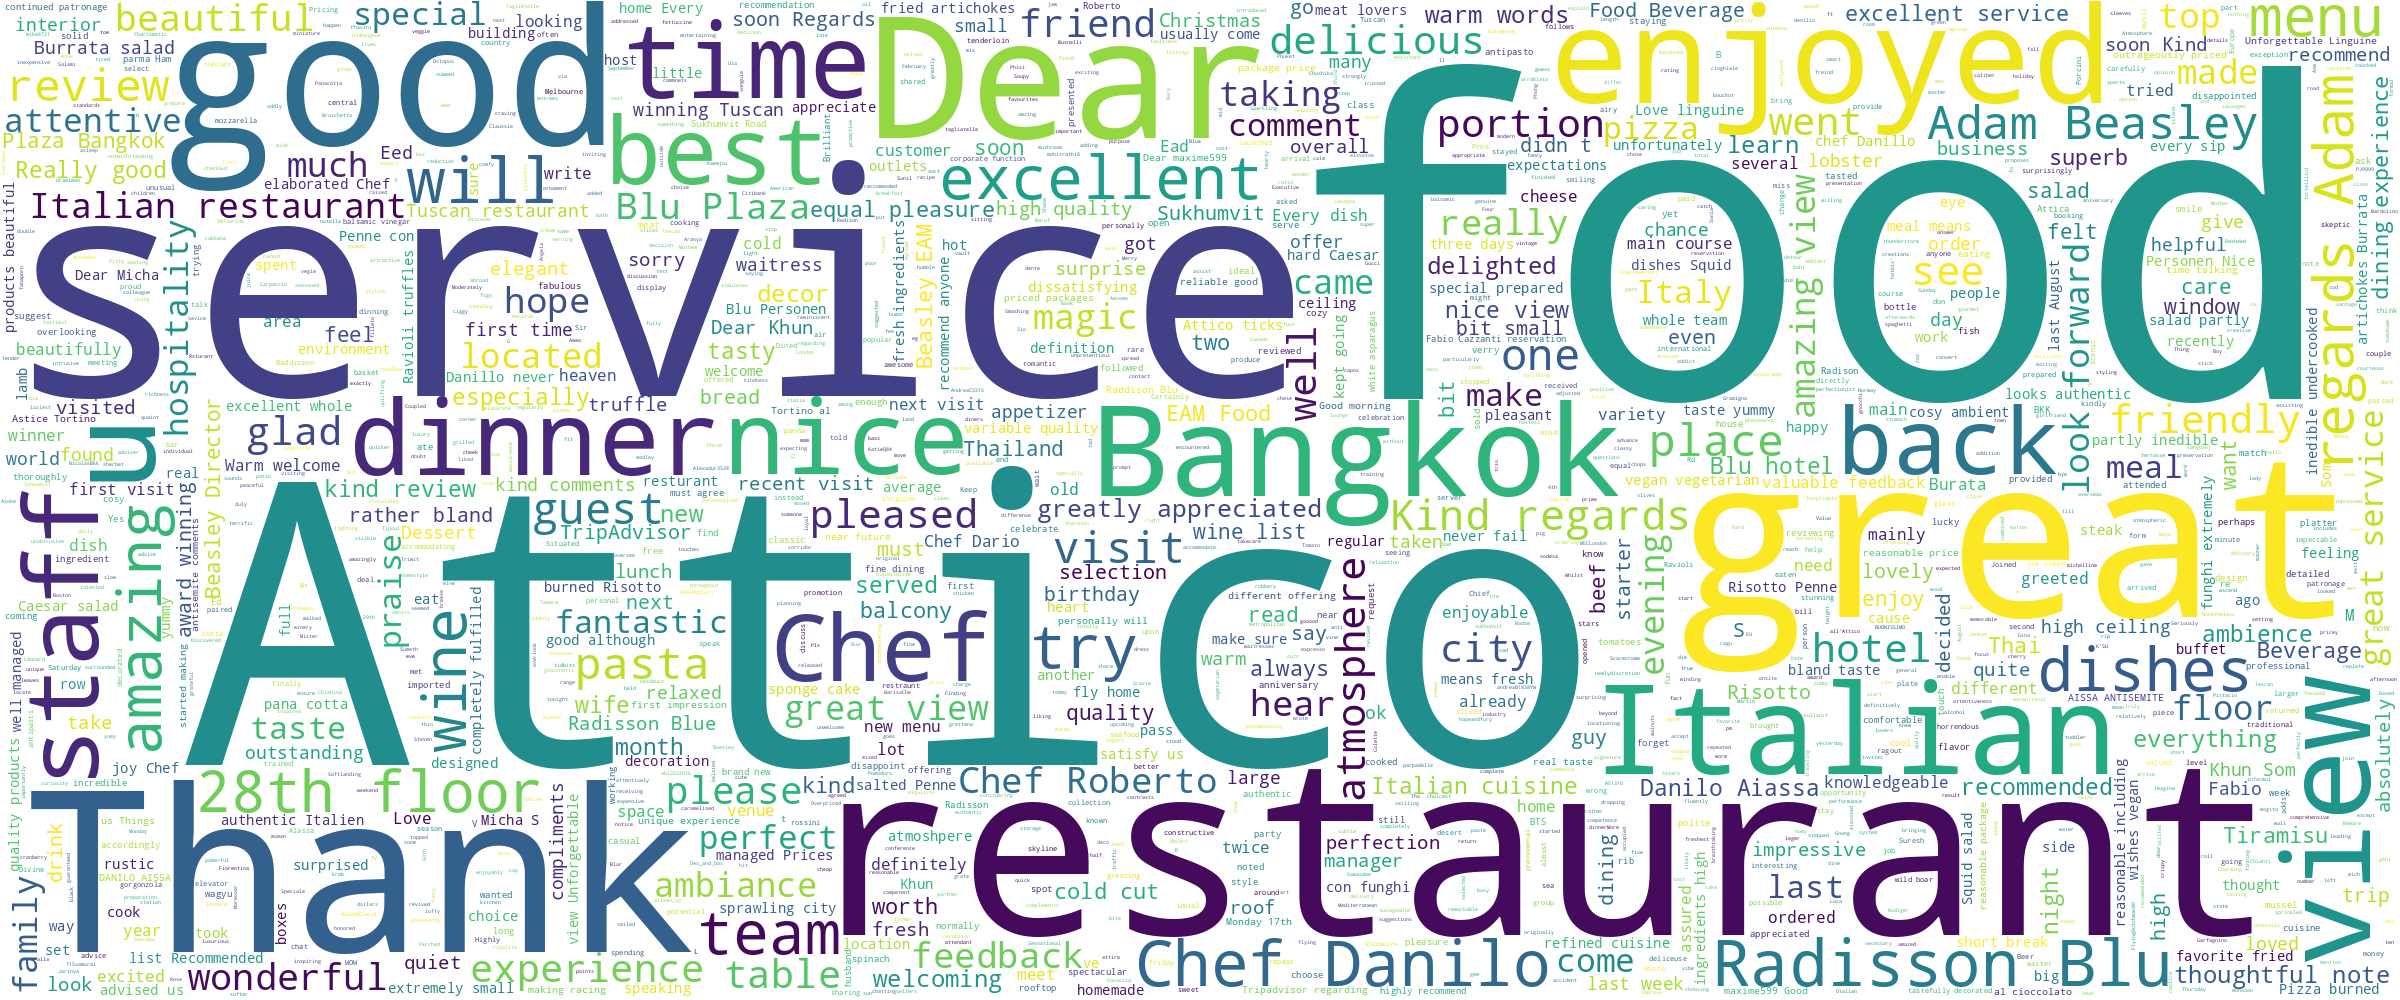

In [ ]:
wordcloud.to_image()